In [113]:
# Importiamo le librerie

from itertools import combinations
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from itertools import combinations
from os import listdir
from os.path import isfile, join

In [114]:
# Variabili globali

mypath = 'dataset'

# Mi vado a prendere i path di tutti i file nella cartella dataset

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Mi vado a generare tutte le possibili combinazioni di due elementi da un insieme di 5 elementi


comb = list(combinations(range(0,5), 2))

In [115]:
# Andiamo a leggere i file pickle per importare i dataset

all = []

all_document = []

for a in onlyfiles:
    b = a.replace('.csv','')
    with open('pickle/'+'Friday-02-03-2018_TrafficForML_CICFlowMeter'+'/scaled_document.pickle', 'rb') as handle:
        all.append(pickle.load(handle))

    with open('pickle/'+'Friday-02-03-2018_TrafficForML_CICFlowMeter'+'/scaled_document_plot.pickle', 'rb') as handle:
        all_document.append(pickle.load(handle))

array([[<Axes: title={'center': 'F_Score'}>]], dtype=object)

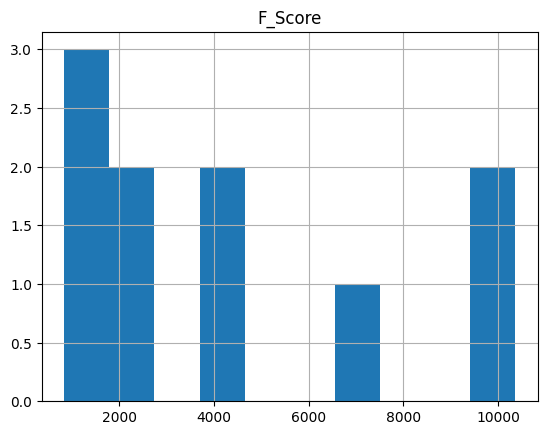

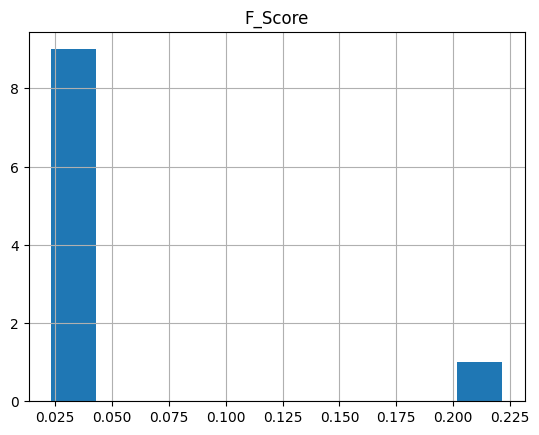

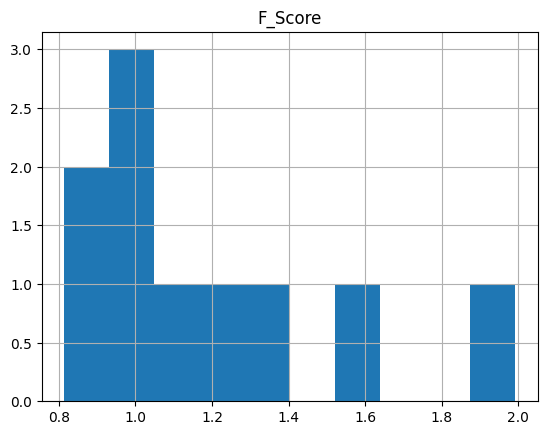

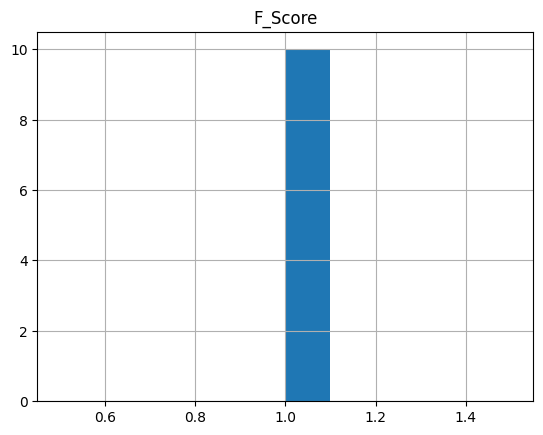

In [116]:
# Andiamo a pulire tutti i dataset

# Come prima cosa andiamo a leggere le feature dai vari file csv

'''for a in onlyfiles:
    '''
anova = pd.read_csv('top_feature/'+'Friday-23-02-2018_TrafficForML_CICFlowMeter'+"/anova.csv")
tree = pd.read_csv('top_feature/'+'Friday-23-02-2018_TrafficForML_CICFlowMeter'+"/ExtraTree.csv")
svm = pd.read_csv('top_feature/'+'Friday-23-02-2018_TrafficForML_CICFlowMeter'+"/SVM.csv")
rfe = pd.read_csv('top_feature/'+'Friday-23-02-2018_TrafficForML_CICFlowMeter'+"/RFE.csv")


In [117]:
display(svm)

,F_Score,Input_Features
0,-1.992263,Fwd Pkt Len Std
1,-1.600214,Bwd Pkt Len Max
2,-1.358872,Pkt Len Max
3,-1.176763,Fwd Pkt Len Max
4,-1.086863,Bwd Pkt Len Std
5,-1.017822,RST Flag Cnt
6,-1.017822,ECE Flag Cnt
7,-0.936628,Pkt Len Min
8,-0.873449,Idle Std
9,-0.814036,Init Fwd Win Byts


In [118]:
# Facciamo una concatenazione dei vari dataframe.
# Saranno utilizzati per prendere le feature che si ripetono di più e che hanno i punteggi maggiori

total_feature = pd.concat([anova,tree,svm,rfe],ignore_index=True)
total_feature_count = pd.concat([anova,tree,svm,rfe],ignore_index=True)

In [119]:
# Andiamo a eseguire un operazione di group by, con successivo count delle occorrenze dei vari campi

total_feature_count = total_feature_count.groupby(['Input_Features']).count().reset_index().sort_values(by='F_Score',ascending=False)

# Andiamo a rinominare la colonna F_Score, che adesso contiene i valori di count

total_feature_count.rename(columns = {'F_Score':'Conto'}, inplace = True)
print(total_feature_count)

       Input_Features  Conto
5        ECE Flag Cnt      3
21  Init Fwd Win Byts      3
16    Fwd Pkt Len Std      2
2    Bwd Pkt Len Mean      2
25   Subflow Fwd Byts      2
24       RST Flag Cnt      2
23        Pkt Len Min      2
7        Flow IAT Max      2
19           Idle Std      2
1     Bwd Pkt Len Max      2
17         Fwd Pkts/s      2
0          Active Min      1
22        Pkt Len Max      1
20  Init Bwd Win Byts      1
18   Fwd Seg Size Avg      1
13    Fwd Pkt Len Max      1
15    Fwd Pkt Len Min      1
14   Fwd Pkt Len Mean      1
12        Fwd IAT Tot      1
11  Fwd Act Data Pkts      1
10        Flow Pkts/s      1
9        Flow IAT Std      1
8        Flow IAT Min      1
6       Flow Duration      1
4    Bwd Seg Size Avg      1
3     Bwd Pkt Len Std      1
26    TotLen Fwd Pkts      1


In [120]:
# Delle delle feature più frequenti mi interessano le prime dieci

most_frequent = total_feature_count[:10]

print(most_frequent)

       Input_Features  Conto
5        ECE Flag Cnt      3
21  Init Fwd Win Byts      3
16    Fwd Pkt Len Std      2
2    Bwd Pkt Len Mean      2
25   Subflow Fwd Byts      2
24       RST Flag Cnt      2
23        Pkt Len Min      2
7        Flow IAT Max      2
19           Idle Std      2
1     Bwd Pkt Len Max      2


In [121]:
# Ci serve ancora il parametro F_Scores, quindi creiamo un nuovo dataframe con queste righe.
# Abbiamo le dieci righe, però, sono ancora presenti le ridondanze che prima avevamo eliminato.

test = pd.DataFrame(data=[],columns=total_feature.columns)

for a in most_frequent['Input_Features']:
    test = pd.concat([test,total_feature[total_feature['Input_Features'] == a]])

print(test)

       Input_Features       F_Score
12       ECE Flag Cnt      0.038647
26       ECE Flag Cnt     -1.017822
33       ECE Flag Cnt      1.000000
10  Init Fwd Win Byts      0.221563
29  Init Fwd Win Byts     -0.814036
36  Init Fwd Win Byts      1.000000
20    Fwd Pkt Len Std     -1.992263
30    Fwd Pkt Len Std      1.000000
8    Bwd Pkt Len Mean    840.180876
13   Bwd Pkt Len Mean      0.029319
1    Subflow Fwd Byts  10357.547072
38   Subflow Fwd Byts      1.000000
11       RST Flag Cnt      0.039972
25       RST Flag Cnt     -1.017822
3         Pkt Len Min   4287.032788
27        Pkt Len Min     -0.936628
14       Flow IAT Max      0.028172
34       Flow IAT Max      1.000000
7            Idle Std   1282.559582
28           Idle Std     -0.873449
21    Bwd Pkt Len Max     -1.600214
32    Bwd Pkt Len Max      1.000000


In [123]:
# Creo una variabile all'interno del quale vado a salvare il groupby del precedente dataframe, solo che in uesto caso
# andiamo a sommare i punteggi di F_Scores, invece di contare le occorrenze.

group_by = test.groupby(['Input_Features'])['F_Score'].sum().reset_index()

In [124]:
print(group_by)

      Input_Features       F_Score
0    Bwd Pkt Len Max     -0.600214
1   Bwd Pkt Len Mean    840.210195
2       ECE Flag Cnt      0.020826
3       Flow IAT Max      1.028172
4    Fwd Pkt Len Std     -0.992263
5           Idle Std   1281.686133
6  Init Fwd Win Byts      0.407527
7        Pkt Len Min   4286.096160
8       RST Flag Cnt     -0.977850
9   Subflow Fwd Byts  10358.547072


In [125]:
# Facciamo un ordinamento del dataframe precedente

print(group_by.sort_values(by='F_Score',ascending=False))

      Input_Features       F_Score
9   Subflow Fwd Byts  10358.547072
7        Pkt Len Min   4286.096160
5           Idle Std   1281.686133
1   Bwd Pkt Len Mean    840.210195
3       Flow IAT Max      1.028172
6  Init Fwd Win Byts      0.407527
2       ECE Flag Cnt      0.020826
0    Bwd Pkt Len Max     -0.600214
8       RST Flag Cnt     -0.977850
4    Fwd Pkt Len Std     -0.992263


In [126]:
# A questo punto, terminiamo l'operazione andando a moltiplicare la frequenza per la somma dei punteggi delle varie feature.

last_feature = pd.DataFrame(data=[],columns=group_by.columns)

for a,b in zip(most_frequent['Input_Features'],most_frequent['Conto']):
    last_feature.loc[len(last_feature)] =  {'Input_Features':a,'F_Score':group_by[group_by['Input_Features'] == a]['F_Score'].values[0]*b}
    

In [127]:
# Facciamo una stampa ordinata

print(last_feature.sort_values(by='F_Score',ascending=False))

      Input_Features       F_Score
4   Subflow Fwd Byts  20717.094143
6        Pkt Len Min   8572.192321
8           Idle Std   2563.372266
3   Bwd Pkt Len Mean   1680.420391
7       Flow IAT Max      2.056343
1  Init Fwd Win Byts      1.222581
0       ECE Flag Cnt      0.062478
9    Bwd Pkt Len Max     -1.200427
5       RST Flag Cnt     -1.955700
2    Fwd Pkt Len Std     -1.984527


In [128]:
# A questo punto ci interessano solo le prime 5 feature, e tutte le loro possibili combinazioni di due elementi.

esito_finale = pd.DataFrame(data=[],columns=['Feature_1','Feature_2'])
top_index = []

# Qui andiamo a prendere gli indici delle prime 5 features

for a in range(0,5):
    top_index.append(last_feature.sort_values(by='F_Score',ascending=False).index[a])
    
# Andiamo a inserire tutte le possibili combinazioni nel dataframe

for b in comb:
    print(last_feature.loc[top_index[b[0]]]['Input_Features'])
    print(last_feature.loc[top_index[b[1]]]['Input_Features'])
    esito_finale.loc[len(esito_finale)] =  {
        'Feature_1': last_feature.loc[top_index[b[0]]]['Input_Features'],
        'Feature_2': last_feature.loc[top_index[b[1]]]['Input_Features']
        }

Subflow Fwd Byts
Pkt Len Min
Subflow Fwd Byts
Idle Std
Subflow Fwd Byts
Bwd Pkt Len Mean
Subflow Fwd Byts
Flow IAT Max
Pkt Len Min
Idle Std
Pkt Len Min
Bwd Pkt Len Mean
Pkt Len Min
Flow IAT Max
Idle Std
Bwd Pkt Len Mean
Idle Std
Flow IAT Max
Bwd Pkt Len Mean
Flow IAT Max


In [129]:
print(esito_finale)

          Feature_1         Feature_2
0  Subflow Fwd Byts       Pkt Len Min
1  Subflow Fwd Byts          Idle Std
2  Subflow Fwd Byts  Bwd Pkt Len Mean
3  Subflow Fwd Byts      Flow IAT Max
4       Pkt Len Min          Idle Std
5       Pkt Len Min  Bwd Pkt Len Mean
6       Pkt Len Min      Flow IAT Max
7          Idle Std  Bwd Pkt Len Mean
8          Idle Std      Flow IAT Max
9  Bwd Pkt Len Mean      Flow IAT Max
